    ano Nordeste  Media Nacional Sudeste
0  2014    23.8%            49.8   78.3%
1  2015    24.7%            49.6   77.2%
2  2016    26.8%            51.5   78.6%
3  2017    26.9%            52.4   78.6%
4  2018    28.0%            53.2   79.2%
5  2019    28.3%            54.1   79.5%
6  2020    30.3%            55.0   80.5%
7  2021    30.2%            55.8   81.7%
8  2022    31.4%            56.0   80.9%


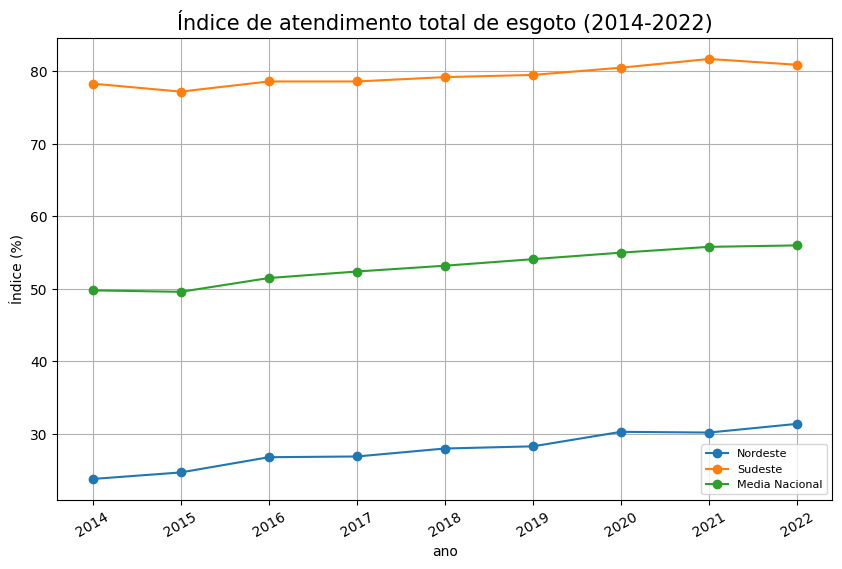

In [50]:
# dataFrame do esgotamento sanitario do nordeste e suldeste entre 2014 e 2022
#índice do atendimento total de esgoto por região
#fonte:  SNIS 2023
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'ano':[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Nordeste':['23.8%', '24.7%', '26.8%', '26.9%', '28.0%', '28.3%', '30.3%', '30.2%','31.4%'], #Aqui os valores estão em porcentagem
    'Media Nacional':[49.8, 49.6, 51.5, 52.4,53.2, 54.1, 55.0, 55.8, 56.0],
    'Sudeste':['78.3%', '77.2%', '78.6%', '78.6%', '79.2%', '79.5%', '80.5%', '81.7%', '80.9%'] #Aqui os valores estão em porcentagem
}

#Visualização do dataframe
df = pd.DataFrame(data)
print(df)

#Gráfico de série temporal entre a região nordeste e suldeste

# Remove o símbolo de % e converte para float
df['Nordeste'] = df['Nordeste'].str.replace('%', '').astype(float)
df['Sudeste'] = df['Sudeste'].str.replace('%', '').astype(float)
 
 #Gráfico de série temporal
plt.figure(figsize=(10, 6))
plt.plot(df['ano'], df['Nordeste'], marker='o', label='Nordeste')
plt.plot(df['ano'], df['Sudeste'], marker= 'o', label='Sudeste')
plt.plot(df['ano'], df['Media Nacional'], marker='o', label='Media Nacional')

#customizando o gráfico

# Adding a plot title and customizing its font size
plt.title('Índice de atendimento total de esgoto (2014-2022)', fontsize= 15)

# Nomeia os eixos X e Y
plt.xlabel('ano')
plt.ylabel('Índice (%)')

#adiciona uma grade
plt.grid(True)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=10)

plt.legend(fontsize=8) # define o tamanho da legenda
plt.show()




Após analisar o gráfico notamos que  tanto a região sudeste como a região nordeste tiveram um aumento no atendimento de esgoto para sua região. Entretanto, a região nordeste ficou abaixo da média nacional chegando ao máximo de 31, 4% da sua população atendida com um sistema de esgoto, durante o periódo, analisado. Se comparada com região suldeste, notamos que os valores dos índices não chegam à metade da região sudeste. O que reflete a realidade econômica da região.

A evolução mais tímida dos índices no Nordeste indica a necessidade de maior priorização de políticas públicas voltadas à ampliação do saneamento básico, considerando o impacto direto desses serviços na saúde pública, na qualidade de vida e na dignidade das populações mais vulneráveis.

10:37:14 - cmdstanpy - INFO - Chain [1] start processing
10:37:14 - cmdstanpy - INFO - Chain [1] done processing


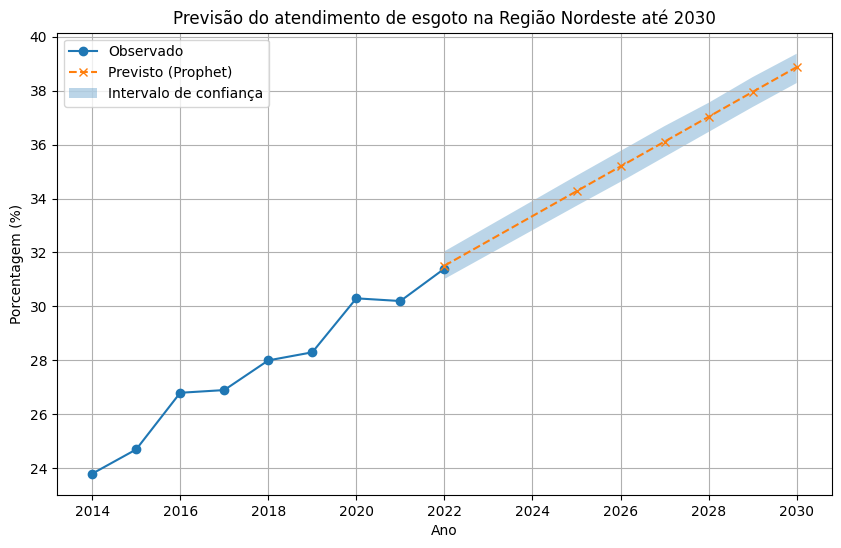

    Ano  % Previsto
0  2022   31.508307
1  2025   34.269570
2  2026   35.189152
3  2027   36.108733
4  2028   37.028314
5  2029   37.950415
6  2030   38.869997


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Dados
data = {
    'ano':[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Nordeste':['23.8%', '24.7%', '26.8%', '26.9%', '28.0%', '28.3%', '30.3%', '30.2%', '31.4%'],
}

# Conversão dos dados
df = pd.DataFrame(data)
df['Nordeste'] = df['Nordeste'].str.replace('%', '').astype(float)
df_prophet = df[['ano', 'Nordeste']].rename(columns={'ano': 'ds', 'Nordeste': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Treinamento
model = Prophet(yearly_seasonality=False)
model.fit(df_prophet)

# Criação do DataFrame de datas até 2030 (sem 2023 e 2024)
future = pd.DataFrame({'ds': pd.date_range(start='2022', end='2030', freq='YS')})
future = future[~future['ds'].dt.year.isin([2023, 2024])]

# Previsão
forecast = model.predict(future)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'].dt.year, df_prophet['y'], label='Observado', marker='o')
plt.plot(forecast['ds'].dt.year, forecast['yhat'], label='Previsto (Prophet)', linestyle='--', marker='x')
plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.3, label='Intervalo de confiança')
plt.title('Previsão do atendimento de esgoto na Região Nordeste até 2030')
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')
plt.legend()
plt.grid()
plt.show()

# Tabela prevista
tabela_prevista = forecast[['ds', 'yhat']].copy()
tabela_prevista['Ano'] = tabela_prevista['ds'].dt.year
tabela_prevista['% Previsto'] = tabela_prevista['yhat']
tabela_prevista = tabela_prevista[['Ano', '% Previsto']]
print(tabela_prevista)


10:37:52 - cmdstanpy - INFO - Chain [1] start processing
10:37:52 - cmdstanpy - INFO - Chain [1] done processing
10:37:52 - cmdstanpy - INFO - Chain [1] start processing
10:37:52 - cmdstanpy - INFO - Chain [1] done processing
10:37:52 - cmdstanpy - INFO - Chain [1] start processing
10:37:52 - cmdstanpy - INFO - Chain [1] done processing


Região   Ano  Media Nacional  Nordeste  Sudeste
0       2022           56.12     31.51    81.42
1       2025           57.73     34.27    83.00
2       2026           58.27     35.19    83.53
3       2027           58.80     36.11    84.06
4       2028           59.34     37.03    84.59
5       2029           59.88     37.95    85.12
6       2030           60.42     38.87    85.64


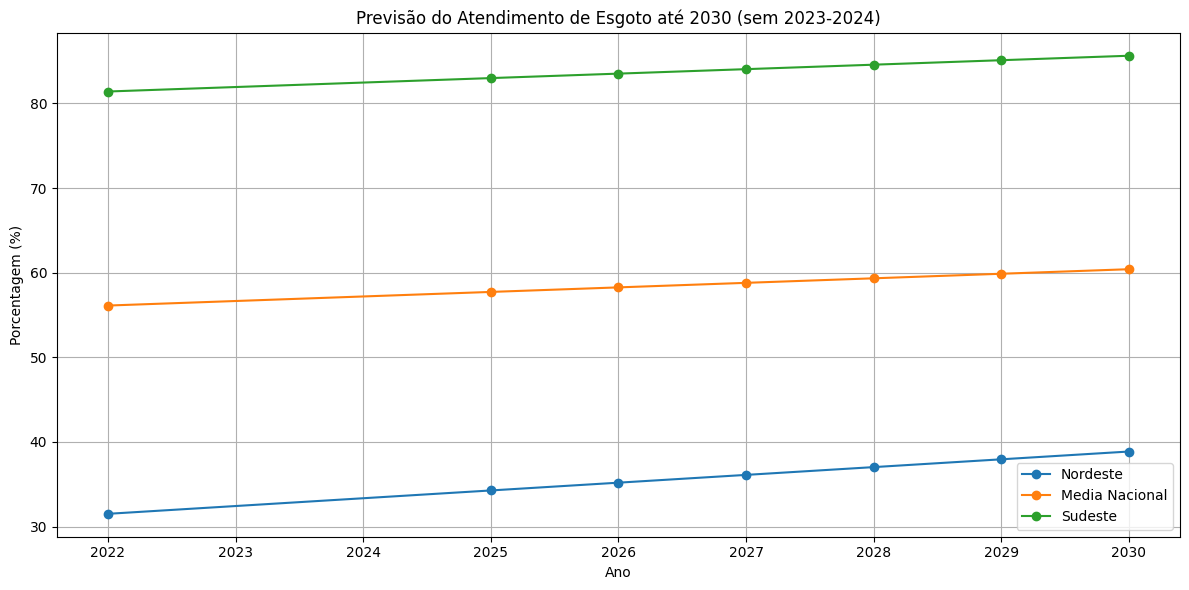

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Dados
data = {
    'ano':[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Nordeste':['23.8%', '24.7%', '26.8%', '26.9%', '28.0%', '28.3%', '30.3%', '30.2%','31.4%'],
    'Media Nacional':[49.8, 49.6, 51.5, 52.4,53.2, 54.1, 55.0, 55.8, 56.0],
    'Sudeste':['78.3%', '77.2%', '78.6%', '78.6%', '79.2%', '79.5%', '80.5%', '81.7%', '80.9%']
}

# Criar DataFrame
df = pd.DataFrame(data)
df['Nordeste'] = df['Nordeste'].str.replace('%', '').astype(float)
df['Sudeste'] = df['Sudeste'].str.replace('%', '').astype(float)

# Função para preparar e prever com Prophet
def prever_serie(nome_coluna, df_original):
    df_prophet = df_original[['ano', nome_coluna]].rename(columns={'ano': 'ds', nome_coluna: 'y'})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
    model = Prophet(yearly_seasonality=False)
    model.fit(df_prophet)

    future = pd.date_range(start='2022', end='2030', freq='YS')
    future = future[~future.year.isin([2023, 2024])]
    future_df = pd.DataFrame({'ds': future})
    forecast = model.predict(future_df)
    forecast['Ano'] = forecast['ds'].dt.year
    forecast['Região'] = nome_coluna
    return forecast[['Ano', 'yhat', 'Região']]

# Previsões
prev_nordeste = prever_serie('Nordeste', df)
prev_media = prever_serie('Media Nacional', df)
prev_sudeste = prever_serie('Sudeste', df)

# Unir as previsões
df_prev = pd.concat([prev_nordeste, prev_media, prev_sudeste])

# Pivotar para tabela final
tabela_final = df_prev.pivot(index='Ano', columns='Região', values='yhat').reset_index()
print(tabela_final.round(2))

# Plotar o gráfico comparativo
plt.figure(figsize=(12, 6))
for regiao in ['Nordeste', 'Media Nacional', 'Sudeste']:
    plt.plot(tabela_final['Ano'], tabela_final[regiao], marker='o', label=regiao)

plt.title('Previsão do Atendimento de Esgoto até 2030 (sem 2023-2024)')
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Comparando os três gráficos de série temporal para a região nordeste podemos ver claramente que a previsão de crescimento para o atendimento de esgoto até 2030 ainda fica baixo da média nacional, não ultrapassando os 40%. A região sudeste continuará tendo um crescimento maior que a média nacional, chegando a valores que ultrapassam 85% do atendimento de esgoto para a região.